Q.1 How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

The resulting matrix will have (n,m) rows and columns. The matrix multiplication is done by multiplying row by column method. Each element of (n,m) row is multiplied with corresponding column element of (k,m) and added up to get one element of the new (n,m) matrix. For each element there will be k times multiplications and k-1 times addition. As there are (n X m) elements in the resulting matrix, the total multiplication will be (n X m X k) and total addition will be (n X m X (k-1)). Total operations (n X m X (2k-1)).

Q.2 Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [2]:
import numpy as np
import time
#Sample Matrix
A = [[1, 2, 3], [4, 5, 6]]
B = [[7, 8], [9, 10], [11, 12]]

def matrix_multi(A,B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])
    
    C = [[0 for _ in range(m)] for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for l in range(k):
                C[i][j] += A[i][l] * B[l][j]
    return C
start1 = time.time()
C_list = matrix_multi(A, B)
end1 = time.time()
time_list = end1 - start1
print("List of Lists Result:", C_list)
print("List of Lists Time:", time_list)

#Using Numpy
A_np = np.array(A)
B_np = np.array(B)

start2 = time.time()
C_np = np.dot(A_np, B_np)
end2 = time.time()
time_np = end2 - start2
print("NumPy Result:", C_np)
print("NumPy Time:", time_np)

List of Lists Result: [[58, 64], [139, 154]]
List of Lists Time: 0.000997304916381836
NumPy Result: [[ 58  64]
 [139 154]]
NumPy Time: 0.0


The list of list method takes O(n X m X n) or cubic time to complete the task. But np.dot() works in O(n) time complexity and hence is faster than list of list method.

Q.4 What is the gradient of the following function with respect to x and y? $${x^2y+y^3sin(x)}$$

The gradient of a function is given by:
$$ \nabla f(x,y) = \left( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right) $$

Partial Derivative with Respect to x:

$$ \frac{\partial f}{\partial x} = 2xy + y^3 \cos x $$

Partial Derivative with Respect to y:

$$ \frac{\partial f}{\partial y} = x^2 + 3y^2 \sin x $$

The gradient of f(x,y) is:
$$ \nabla f = \left( 2xy + y^3 \cos x, x^2 + 3y^2 \sin x \right) $$


Q.5 Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [8]:
import jax
import jax.numpy as jnp
import numpy as np

def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

grad_f = jax.grad(f, (0, 1))

def analytical_grad_f(x, y):
    df_dx = 2 * x * y + y**3 * jnp.cos(x)
    df_dy = x**2 + 3 * y**2 * jnp.sin(x)
    return df_dx, df_dy

np.random.seed(0)
random_values = [(np.random.rand(), np.random.rand()) for _ in range(5)]

for x, y in random_values:
    x = jnp.array(x)
    y = jnp.array(y)
    jax_grad = grad_f(x, y)
    analytical_grad = analytical_grad_f(x, y)
    
    print(f"Evaluating at x = {x}, y = {y}")
    print(f"JAX gradient: {jax_grad}")
    print(f"Analytical gradient: {analytical_grad}")
    print(f"Difference: (dx: {jax_grad[0] - analytical_grad[0]}, dy: {jax_grad[1] - analytical_grad[1]})\n")


Evaluating at x = 0.54881352186203, y = 0.7151893377304077
JAX gradient: (Array(1.0971053, dtype=float32, weak_type=True), Array(1.1017004, dtype=float32, weak_type=True))
Analytical gradient: (Array(1.0971053, dtype=float32, weak_type=True), Array(1.1017004, dtype=float32, weak_type=True))
Difference: (dx: 0.0, dy: 0.0)

Evaluating at x = 0.6027633547782898, y = 0.5448831915855408
JAX gradient: (Array(0.79013664, dtype=float32, weak_type=True), Array(0.86827624, dtype=float32, weak_type=True))
Analytical gradient: (Array(0.79013664, dtype=float32, weak_type=True), Array(0.86827624, dtype=float32, weak_type=True))
Difference: (dx: 0.0, dy: 0.0)

Evaluating at x = 0.42365479469299316, y = 0.6458941102027893
JAX gradient: (Array(0.79290414, dtype=float32, weak_type=True), Array(0.69398403, dtype=float32, weak_type=True))
Analytical gradient: (Array(0.79290414, dtype=float32, weak_type=True), Array(0.69398403, dtype=float32, weak_type=True))
Difference: (dx: 0.0, dy: 0.0)

Evaluating at x

Q.6 Use sympy to confirm that you obtain the same gradient analytically.

In [7]:
import sympy as sp

x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)
grad_f = (sp.diff(f, x), sp.diff(f, y))
grad_f = [sp.simplify(partial) for partial in grad_f]
print(f"Gradient of f(x, y): {grad_f}")

Gradient of f(x, y): [y*(2*x + y**2*cos(x)), x**2 + 3*y**2*sin(x)]


Q.7 Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:
    1. 2022
        1. Branch 1
            1. Roll Number: 1, Name: N, Marks:
                1. Maths: 100, English: 70 …
        2. Branch 2
    2. 2023
        1. Branch 1
        2. Branch 2
    3. 2024
        1. Branch 1
        2. Branch 2
    4. 2025
        1. Branch 1
        2. Branch 2

In [16]:
students = {
    2022: {
        "MSE": {
            "Roll No" : 1, "Name" : "Alice", "Marks" : {
                " Maths" : 100, "English" : 97, "Science" : 95}}, 
        "CSE" : {
            "Roll No" : 2, "Name" : "Bob", "Marks" : {
                " Maths" : 100, "English" : 97, "Science" : 95}}}, 
    2023 : {
        "MSE": {
            "Roll No" : 3, "Name" : "Charlie", "Marks" : {
                " Maths" : 100, "English" : 97, "Science" : 95}},
        "CSE" : {
            "Roll No" : 4, "Name" : "David", "Marks" : {
                " Maths" : 100, "English" : 97, "Science" : 95}}}, 
    2024 : {
        "MSE": {
            "Roll No" : 5, "Name" : "Eva", "Marks" : {
                " Maths" : 100, "English" : 97, "Science" : 95}}, 
        "CSE" : {
            "Roll No" : 6, "Name" : "Frank", "Marks" : {
                " Maths" : 100, "English" : 97, "Science" : 95}}}, 
    2025 : {
        "MSE": {
            "Roll No" : 7, "Name" : "Grace", "Marks" : {
                " Maths" : 100, "English" : 97, "Science" : 95}},
        "CSE" : {
            "Roll No" : 8, "Name" : "Henry", "Marks" : {
                " Maths" : 100, "English" : 97, "Science" : 95}}}}
import pprint
pprint.pprint(students)

{2022: {'CSE': {'Marks': {' Maths': 100, 'English': 97, 'Science': 95},
                'Name': 'Bob',
                'Roll No': 2},
        'MSE': {'Marks': {' Maths': 100, 'English': 97, 'Science': 95},
                'Name': 'Alice',
                'Roll No': 1}},
 2023: {'CSE': {'Marks': {' Maths': 100, 'English': 97, 'Science': 95},
                'Name': 'David',
                'Roll No': 4},
        'MSE': {'Marks': {' Maths': 100, 'English': 97, 'Science': 95},
                'Name': 'Charlie',
                'Roll No': 3}},
 2024: {'CSE': {'Marks': {' Maths': 100, 'English': 97, 'Science': 95},
                'Name': 'Frank',
                'Roll No': 6},
        'MSE': {'Marks': {' Maths': 100, 'English': 97, 'Science': 95},
                'Name': 'Eva',
                'Roll No': 5}},
 2025: {'CSE': {'Marks': {' Maths': 100, 'English': 97, 'Science': 95},
                'Name': 'Henry',
                'Roll No': 8},
        'MSE': {'Marks': {' Maths': 100, 'Engli

Q.8 Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [2]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"Student(Roll Number: {self.roll_number}, Name: {self.name}, Marks: {self.marks})"

class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch(Name: {self.name}, Students: {self.students})"

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year(Year: {self.year}, Branches: {self.branches})"

class Database:
    def __init__(self):
        self.years = []

    def add_year(self, year):
        self.years.append(year)

    def __repr__(self):
        return f"Database(Years: {self.years})"

# Create the database
db = Database()

# Add data for year 2022
year_2022 = Year(2022)
branch_1_2022 = Branch("MSE")
branch_1_2022.add_student(Student(1, "Alice", {"Maths": 100, "English": 70}))
branch_1_2022.add_student(Student(2, "Bob", {"Maths": 90, "English": 80}))

branch_2_2022 = Branch("CSE")
branch_2_2022.add_student(Student(3, "Charlie", {"Maths": 85, "English": 75}))

year_2022.add_branch(branch_1_2022)
year_2022.add_branch(branch_2_2022)
db.add_year(year_2022)

# Add data for year 2023
year_2023 = Year(2023)
branch_1_2023 = Branch("MSE")
branch_1_2023.add_student(Student(4, "David", {"Maths": 95, "English": 65}))

branch_2_2023 = Branch("CSE")
branch_2_2023.add_student(Student(5, "Eva", {"Maths": 80, "English": 85}))

year_2023.add_branch(branch_1_2023)
year_2023.add_branch(branch_2_2023)
db.add_year(year_2023)

# Add data for year 2024
year_2024 = Year(2024)
branch_1_2024 = Branch("MSE")
branch_1_2024.add_student(Student(6, "Frank", {"Maths": 78, "English": 88}))

branch_2_2024 = Branch("CSE")
branch_2_2024.add_student(Student(7, "Grace", {"Maths": 92, "English": 81}))

year_2024.add_branch(branch_1_2024)
year_2024.add_branch(branch_2_2024)
db.add_year(year_2024)

# Add data for year 2025
year_2025 = Year(2025)
branch_1_2025 = Branch("MSE")
branch_1_2025.add_student(Student(8, "Henry", {"Maths": 88, "English": 90}))

branch_2_2025 = Branch("CSE")
branch_2_2025.add_student(Student(9, "Isabel", {"Maths": 85, "English": 80}))

year_2025.add_branch(branch_1_2025)
year_2025.add_branch(branch_2_2025)
db.add_year(year_2025)

# Print the database
print(db)

Database(Years: [Year(Year: 2022, Branches: [Branch(Name: MSE, Students: [Student(Roll Number: 1, Name: Alice, Marks: {'Maths': 100, 'English': 70}), Student(Roll Number: 2, Name: Bob, Marks: {'Maths': 90, 'English': 80})]), Branch(Name: CSE, Students: [Student(Roll Number: 3, Name: Charlie, Marks: {'Maths': 85, 'English': 75})])]), Year(Year: 2023, Branches: [Branch(Name: MSE, Students: [Student(Roll Number: 4, Name: David, Marks: {'Maths': 95, 'English': 65})]), Branch(Name: CSE, Students: [Student(Roll Number: 5, Name: Eva, Marks: {'Maths': 80, 'English': 85})])]), Year(Year: 2024, Branches: [Branch(Name: MSE, Students: [Student(Roll Number: 6, Name: Frank, Marks: {'Maths': 78, 'English': 88})]), Branch(Name: CSE, Students: [Student(Roll Number: 7, Name: Grace, Marks: {'Maths': 92, 'English': 81})])]), Year(Year: 2025, Branches: [Branch(Name: MSE, Students: [Student(Roll Number: 8, Name: Henry, Marks: {'Maths': 88, 'English': 90})]), Branch(Name: CSE, Students: [Student(Roll Number:

Q.9 Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

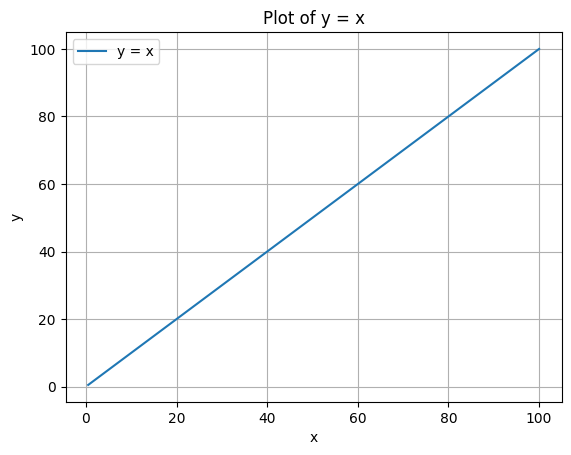

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x-values
x = np.arange(0.5, 100.1, 0.5)

# Define the functions
y1 = x

# Create the plot
plt.figure()

plt.plot(x, y1, label='y = x')

# Set labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


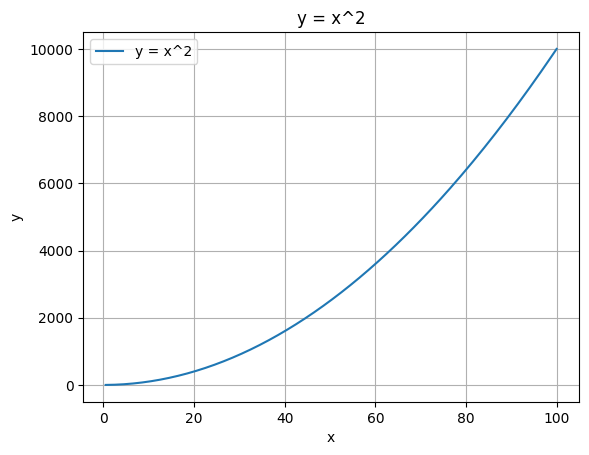

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x-values
x = np.arange(0.5, 100.1, 0.5)

# Define the functions
y2 = x**2

# Create the plot
plt.figure()
plt.plot(x, y2, label='y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^2')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


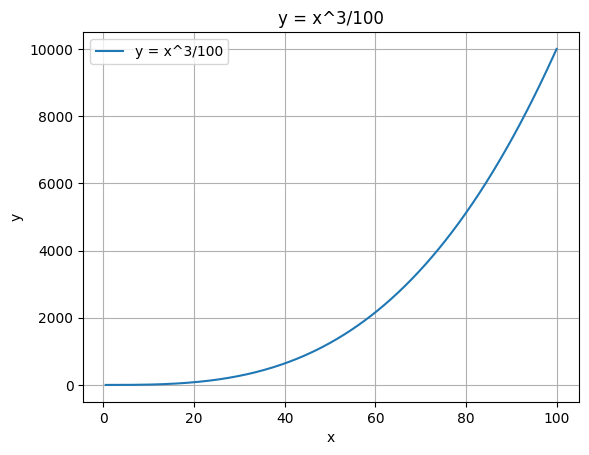

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x-values
x = np.arange(0.5, 100.1, 0.5)

# Define the functions
y = x**3/100

# Create the plot
plt.figure()
plt.plot(x, y, label='y = x^3/100')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = x^3/100')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


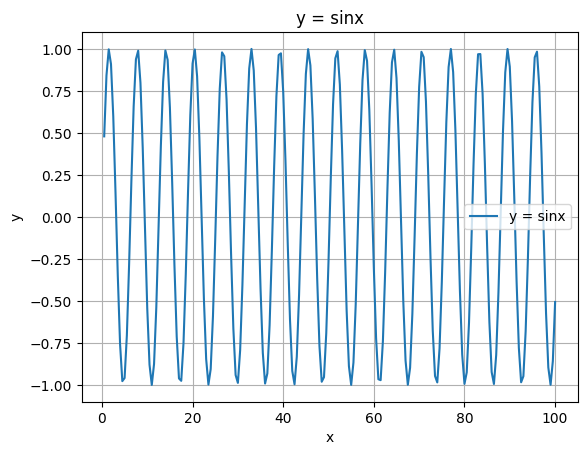

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x-values
x = np.arange(0.5, 100.1, 0.5)

# Define the functions
y = np.sin(x)

# Create the plot
plt.figure()
plt.plot(x, y, label='y = sinx')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = sinx')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


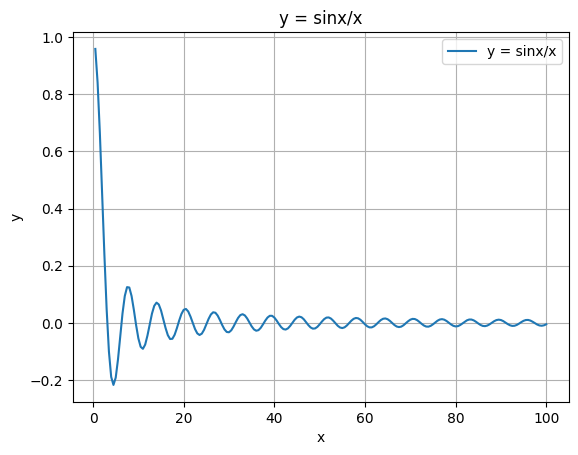

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x-values
x = np.arange(0.5, 100.1, 0.5)

# Define the functions
y = np.sin(x)/x

# Create the plot
plt.figure()
plt.plot(x, y, label='y = sinx/x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = sinx/x')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


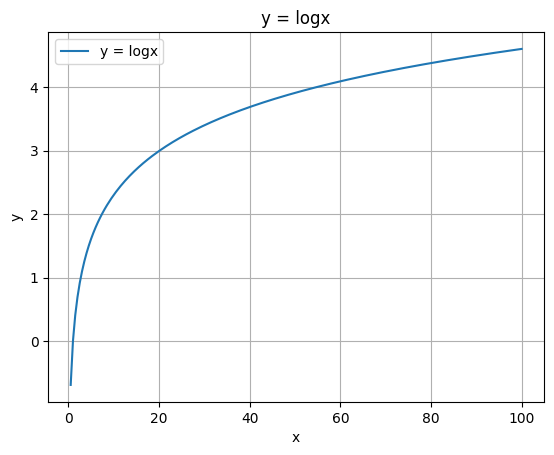

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x-values
x = np.arange(0.5, 100.1, 0.5)

# Define the functions
y = np.log(x)

# Create the plot
plt.figure()
plt.plot(x, y, label='y = logx')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = logx')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


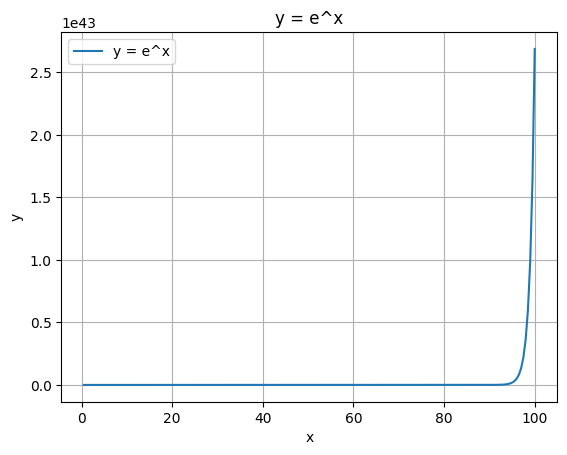

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x-values
x = np.arange(0.5, 100.1, 0.5)

# Define the functions
y = np.exp(x)

# Create the plot
plt.figure()
plt.plot(x, y, label='y = e^x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('y = e^x')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


Q.10 Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [14]:
import numpy as np
import pandas as pd
data = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd', 'e'])
column_with_highest_std = df.std().idxmax()
print("Column with highest standard deviation:", column_with_highest_std)
row_with_lowest_mean = df.mean(axis=1).idxmin()
print("Row with lowest mean:", row_with_lowest_mean)

Column with highest standard deviation: c
Row with lowest mean: 14


Q.11 Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [15]:
import numpy as np
import pandas as pd
data = np.random.uniform(1, 2, size=(20, 5))
df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd', 'e'])
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
count_lt8 = (df['g'] == 'LT8').sum()
print("Number of rows where g is LT8:", count_lt8)
std_lt8 = df[df['g'] == 'LT8']['f'].std()
print("Standard deviation of f for g is LT8:", std_lt8)
std_gt8 = df[df['g'] == 'GT8']['f'].std()
print("Standard deviation of f for g is GT8:", std_gt8)


Number of rows where g is LT8: 15
Standard deviation of f for g is LT8: 0.33175898516022345
Standard deviation of f for g is GT8: 0.1349966291749433


Q.12 Write a small piece of code to explain broadcasting in numpy.

In [18]:
import numpy as np
a = np.array([1, 2, 3])
b = 2
print(a * b) 
a = np.array([[1, 2], [3, 4]])
b = np.array([10, 20])
print(a + b) 
a = np.array([[1], [2], [3]])
b = np.array([4, 5, 6])
print(a * b)
print(" Broadcasting is NumPy's ability to perform operations on arrays of different shapes. ")

[2 4 6]
[[11 22]
 [13 24]]
[[ 4  5  6]
 [ 8 10 12]
 [12 15 18]]
 Broadcasting is NumPy's ability to perform operations on arrays of different shapes. 


Q.13 Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [19]:
import numpy as np

def argmin(arr):
  min_index = 0
  min_value = arr[0]

  for i in range(1, len(arr)):
    if arr[i] < min_value:
      min_index = i
      min_value = arr[i]

  return min_index
    
arr = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])
result = argmin(arr)
print("Index of minimum element:", result)
print("Verified with np.argmin:", np.argmin(arr))

Index of minimum element: 1
Verified with np.argmin: 1
